In [2]:
#from IPython import embed
from coordinates_helpers import *
import scipy.io as sio
import netCDF4 as nc
import numpy as np
import datetime
import xarray as xr
from salishsea_tools import nc_tools



/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/conventions.py:9: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [5]:
# This script builds a coordinates file for the West Coast of Vancouver Island
#
# For reference, the Arakawa-C grid looks like this:
#           f---v---f---v---f  
#           |       |       |
#           u   T   u   T   u
#           |       |       |
#           f---v---f---v---f
#

## Load the x and y vectors 
#ncf = nc.Dataset('basic_grid_seagridv2.nc', 'r')
#x = ncf.variables['grid_lons'][:]
#y = ncf.variables['grid_lats'][:]

# Create 2D array with meshgrid, indexed j,i
#[glamt, gphit]=np.meshgrid(x,y)

mfile = sio.loadmat('/ocean/ssahu/CANYONS/wcvi/grid/seagrid_high_resolution.mat')
glamt = mfile['s'][0,0]['geographic_grids'][0,0]
gphit = mfile['s'][0,0]['geographic_grids'][0,1]

In [6]:
glamt = np.transpose(glamt)
gphit = np.transpose(gphit)

print(glamt.shape)

(301, 401)


In [7]:
# Compute the rest of the grid points
glamu,gphiu = t2u(glamt,gphit)
glamv,gphiv = t2v(glamt,gphit)
glamf,gphif = t2f(glamt,gphit)

# Compute scaling factors (with extrapolation for the left/bottom most scaling factor)
#
e1t = gete1(glamu,gphiu,expandleft=True)   # Need a left u point
e1u = gete1(glamt,gphit)
e1v = gete1(glamf,gphif,expandleft=True)   # Need a left f point
e1f = gete1(glamv,gphiv)
#
e2t = gete2(glamv,gphiv,expanddown=True)   # Need a lower v point
e2u = gete2(glamf,gphif,expanddown=True)   # Need a lower f point
e2v = gete2(glamt,gphit)
e2f = gete2(glamu,gphiu)

# We need to drop the last column at the east and last row at the north
NY,NX = glamt.shape

# Output slices
J,I = slice(0,NY-1), slice(10,NX-1)    ## this is where we truncate the seagrid grid 

#
filename = "coordinates_westcoast_seagrid_high_resolution.nc"
writecoords(filename,
            glamt[J,I],glamu[J,I],glamv[J,I],glamf[J,I],
            gphit[J,I],gphiu[J,I],gphiv[J,I],gphif[J,I],
            e1t[J,I],e1u[J,I],e1v[J,I],e1f[J,I],
            e2t[J,I],e2u[J,I],e2v[J,I],e2f[J,I])

# Add note to history
#cnc = nc.Dataset(filename, 'r+')
#note ='[{}] Rebuilt with correct scaling factors (e1* and e2*)'
#cnc.setncattr('history', note.format(datetime.datetime.today().strftime('%Y-%m-%d')))
#cnc.close()

In [9]:
grid = nc.Dataset('coordinates_westcoast_seagrid_high_resolution.nc')


In [10]:
nc_tools.show_variables(grid)

odict_keys(['nav_lon', 'nav_lat', 'time', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f'])


In [11]:
nc_tools.show_dimensions(grid)

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 390

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 300

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1



In [12]:
nc_tools.show_dataset_attrs(grid)

file format: NETCDF4


In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
lon = grid['glamt'][:]
lat = grid['gphit'][:]


<IPython.core.display.Javascript object>


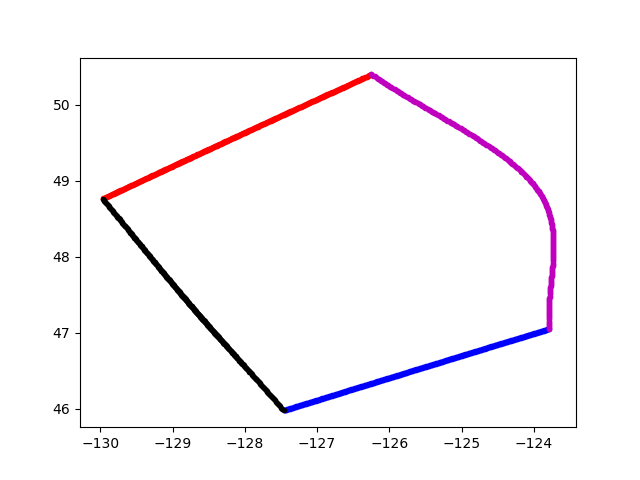

In [14]:
plt.figure(); plt.clf()
plt.plot(glamt[0,:],gphit[0,:],'b.')
plt.plot(glamt[-1,:],gphit[-1,:],'r.')
plt.plot(glamt[:,0],gphit[:,0],'k.')
plt.plot(glamt[:,-1],gphit[:,-1],'m.')

